In [4]:
!pip install yfinance

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
# MASTERCARD DATA DOWNLOAD
sd = yf.download('MA',start='2024-01-01') 
sd.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MA,MA,MA,MA,MA
Date,,,,,
2024-01-02,418.183075,420.552059,415.873531,420.363726,2463700
2024-01-03,415.090424,417.637849,413.831593,417.499095,3093700
2024-01-04,416.081635,419.729323,414.604736,414.822804,2042600
2024-01-05,415.734741,419.045390,413.326070,416.795317,2415900
2024-01-08,418.931458,419.030711,413.520818,416.409799,2125400


In [8]:
sd.size

1650

In [10]:
sd.shape

(330, 5)

<function matplotlib.pyplot.show(close=None, block=None)>

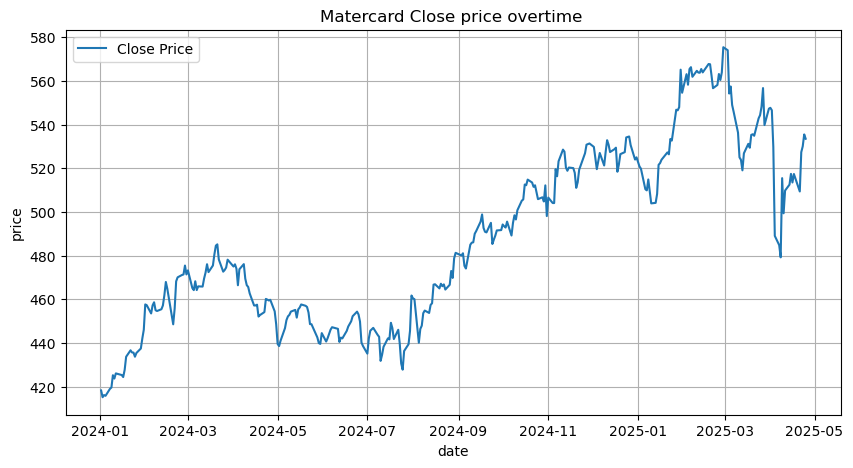

In [12]:
# MASTERCARD CLOSE PRICE VISUALIZATION
plt.figure(figsize=(10,5))
plt.plot(sd.index,sd['Close'],label='Close Price')
plt.title('Matercard Close price overtime ')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

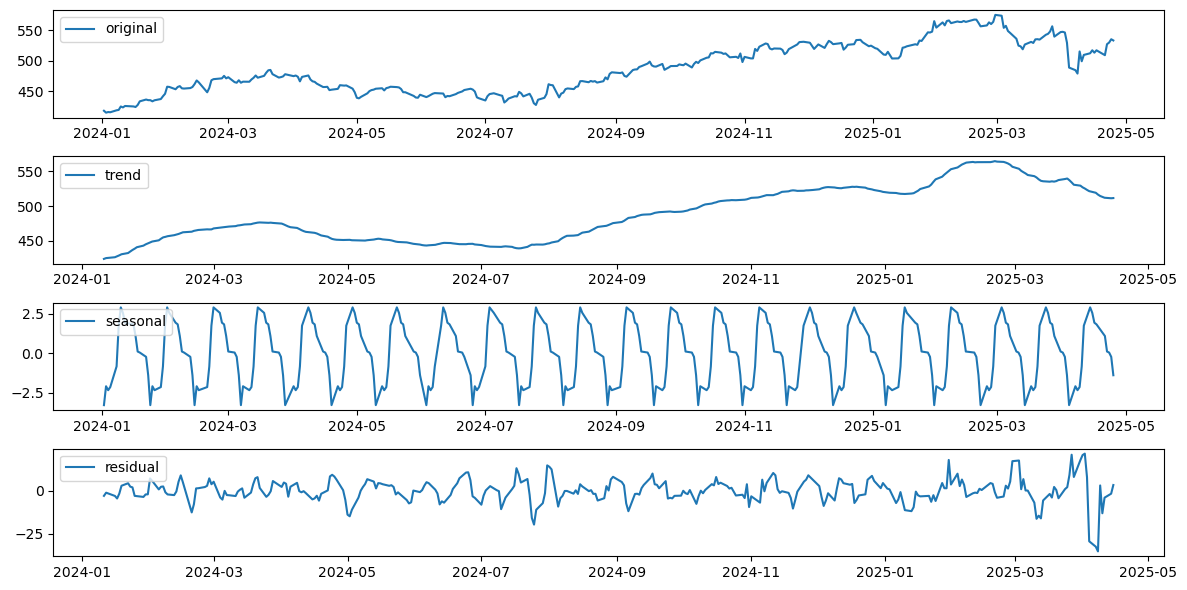

In [14]:
# CLASSICAL DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_additive = seasonal_decompose(sd['Close'],model='additive',period=15)
trend_additive=decompose_additive.trend
seasonal_additive=decompose_additive.seasonal
residual_additive=decompose_additive.resid
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(sd['Close'],label='original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive,label='trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive,label='seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive,label='residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

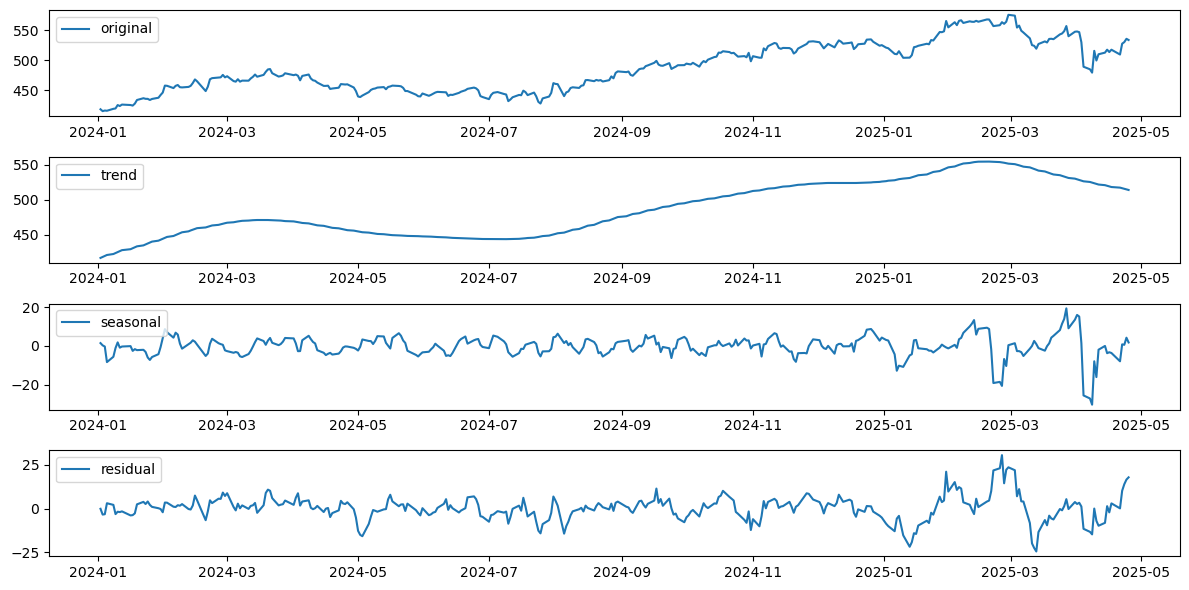

In [16]:
# SEASONAL $ TREND DECOMPOSITION
from statsmodels.tsa.seasonal import STL
stl = STL(sd['Close'],period=30)
result=stl.fit()
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(result.observed,label='original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend,label='trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal,label='seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid,label='residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show

In [26]:
# ADF TEST FOR STATIONARITY
def adf_test(series):
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(series)
    print('ADF TEST RESULTS')
    print(f'ADF Statstics:{round(result[0],3)}')
    print(f'p value:{round(result[1],3)}')
    print('critical values : ')
    for key,value in result[4].items():
        print(f'{key}:{round(value,3)}')
    if result[1] < 0.05:
        print("=> The series is likely stationary (reject H0)")
    else:
        print("=> The series is likely non-stationary (fail to reject H0)")

In [28]:
price = sd['Close']
adf_test(price)

ADF TEST RESULTS
ADF Statstics:-1.664
p value:0.45
critical values : 
1%:-3.451
5%:-2.87
10%:-2.572
=> The series is likely non-stationary (fail to reject H0)


In [30]:
#KPSS TEST
def kpss_test(series):
    from statsmodels.tsa.stattools import kpss
    result = kpss(series,regression='c')
    print('KPSS TEST RESULTS')
    print(f'KPSS Statstics:{round(result[0],3)}')
    print(f'p value:{round(result[1],3)}')
    print('critical values : ')
    for key,value in result[3].items():
         print(f'{key}:{round(value,3)}')
    if result[1] < 0.05:
        print("=> The series is likely non-stationary (reject H0)")
    else:
        print("=> The series is likely stationary (fail to reject H0)")

In [32]:
price=sd['Close']
kpss_test(price)

KPSS TEST RESULTS
KPSS Statstics:2.308
p value:0.01
critical values : 
10%:0.347
5%:0.463
2.5%:0.574
1%:0.739
=> The series is likely non-stationary (reject H0)


C:\Users\jyoti\AppData\Local\Temp\ipykernel_26436\3929196337.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series,regression='c')


In [34]:
#DATA PROCESSING(MISSING VALUES)
sd.isnull().value_counts()

(Close, MA)  (High, MA)  (Low, MA)  (Open, MA)  (Volume, MA)
False        False       False      False       False           330
Name: count, dtype: int64

In [36]:
#DATA PROCESSING (MAKING SERIES STATIONARY USING DIFFERENCING)
price=sd['Close']
Newprice = price.diff()
Newprice = Newprice.dropna()
adf_test(Newprice)

ADF TEST RESULTS
ADF Statstics:-11.264
p value:0.0
critical values : 
1%:-3.451
5%:-2.87
10%:-2.572
=> The series is likely stationary (reject H0)


In [38]:
kpss_test(Newprice)

KPSS TEST RESULTS
KPSS Statstics:0.052
p value:0.1
critical values : 
10%:0.347
5%:0.463
2.5%:0.574
1%:0.739
=> The series is likely stationary (fail to reject H0)


C:\Users\jyoti\AppData\Local\Temp\ipykernel_26436\3929196337.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series,regression='c')


In [ ]:
# SO d = 1

C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jyoti\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


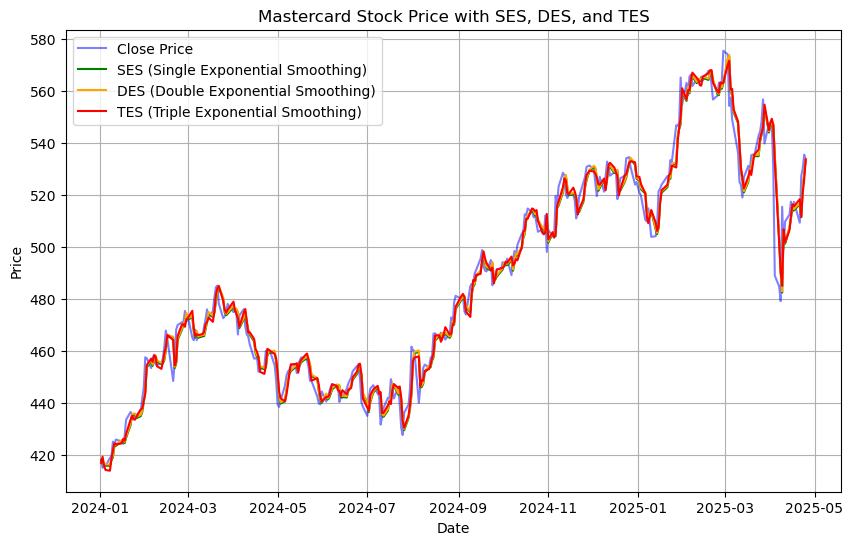

In [40]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Single Exponential Smoothing (SES)
close_prices = sd['Close']
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level=0.7)
sd['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (DES) – Holt's Linear Trend Model
des_model = ExponentialSmoothing(close_prices, trend='add').fit(smoothing_level=0.7)
sd['DES'] = des_model.fittedvalues

# Triple Exponential Smoothing (TES) – Holt-Winters Method with multiplicative trend
tes_model = ExponentialSmoothing(close_prices, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.7)
sd['TES'] = tes_model.fittedvalues

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sd['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(sd['SES'], label='SES (Single Exponential Smoothing)', color='green')
plt.plot(sd['DES'], label='DES (Double Exponential Smoothing)', color='orange')
plt.plot(sd['TES'], label='TES (Triple Exponential Smoothing)', color='red')
plt.title('Mastercard Stock Price with SES, DES, and TES')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jyoti\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


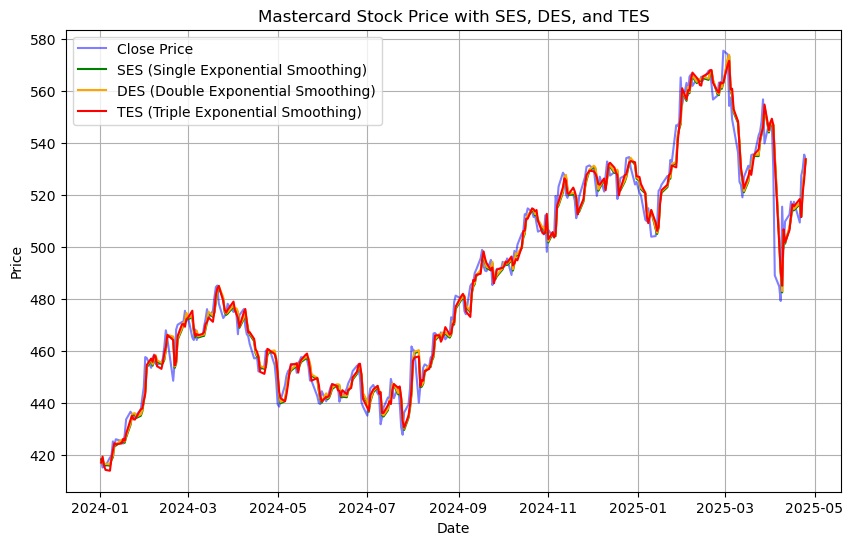

In [42]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Single Exponential Smoothing (SES)
close_prices = sd['Close']
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level=0.7)
sd['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (DES) – Holt's Linear Trend Model
des_model = ExponentialSmoothing(close_prices, trend='add').fit(smoothing_level=0.7)
sd['DES'] = des_model.fittedvalues

# Triple Exponential Smoothing (TES) – Holt-Winters Method
tes_model = ExponentialSmoothing(close_prices, trend='mul', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.7)
sd['TES'] = tes_model.fittedvalues

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sd['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(sd['SES'], label='SES (Single Exponential Smoothing)', color='green')
plt.plot(sd['DES'], label='DES (Double Exponential Smoothing)', color='orange')
plt.plot(sd['TES'], label='TES (Triple Exponential Smoothing)', color='red')
plt.title('Mastercard Stock Price with SES, DES, and TES')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

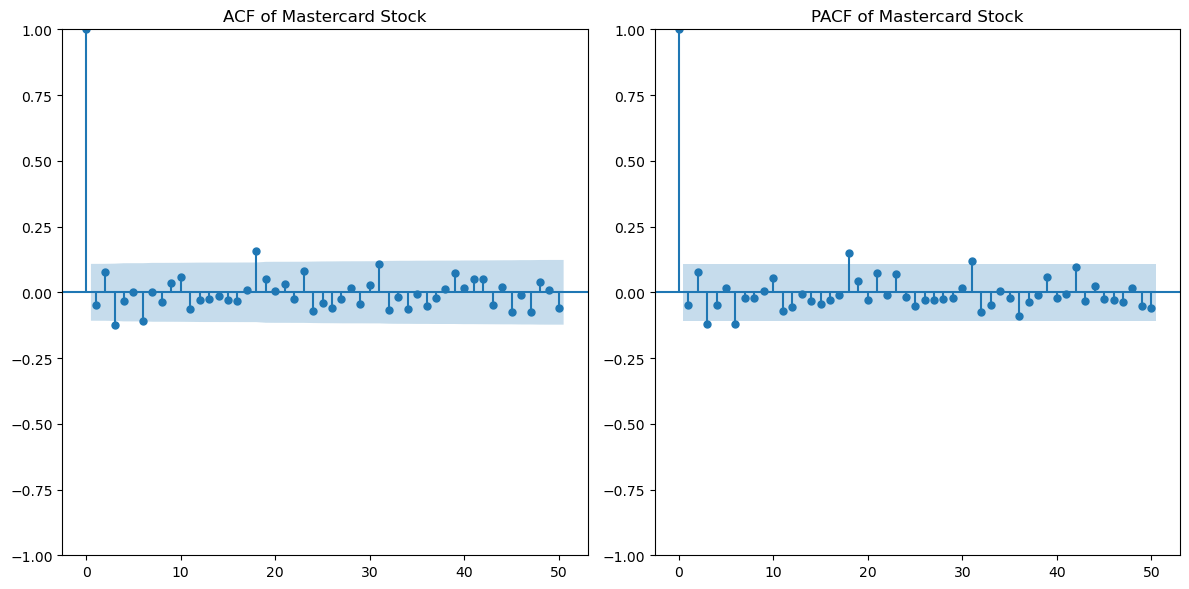

In [44]:
# AUTOCORELEATION FUNCTION(ACF) AND PARTIAL AUTOCORELEATION FUNCTION (PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(sd['Close'].diff().dropna(), ax=plt.gca(), lags=50)
plt.title('ACF of Mastercard Stock')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(sd['Close'].diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF of Mastercard Stock')

plt.tight_layout()
plt.show()

In [ ]:
# AS ACF gives q = 3 and PACF gives p = 30

[*********************100%***********************]  1 of 1 completed


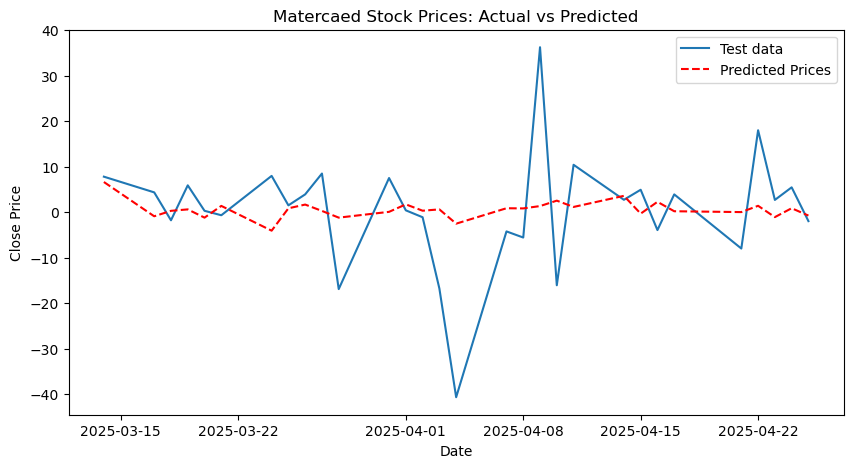

RMSE:  12.29


In [46]:
#FORECASTING........
# 1.AUTOREGRESSION MODEL
# Split the data into training and testing datasets
sd = yf.download('MA',start='2024-01-01')
mastercard_price_stationary = sd['Close'].diff().dropna()
train_data, test_data = mastercard_price_stationary[:-30], mastercard_price_stationary[-30:]
# Import necessary libraries
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()
# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot the actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Matercaed Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

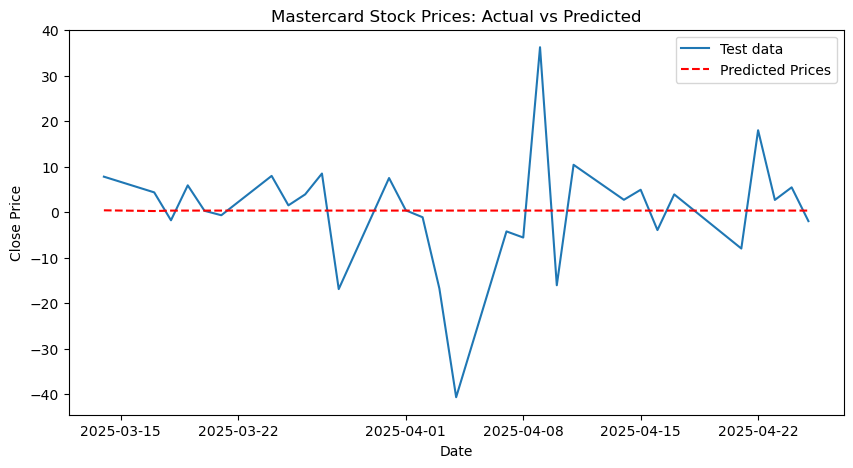

RMSE:  12.61


In [48]:
# Import ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the Moving Average (MA) model to the training data
model = ARIMA(train_data, order=(0, 0, 3))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)
# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Mastercard Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate model using RMSE score
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

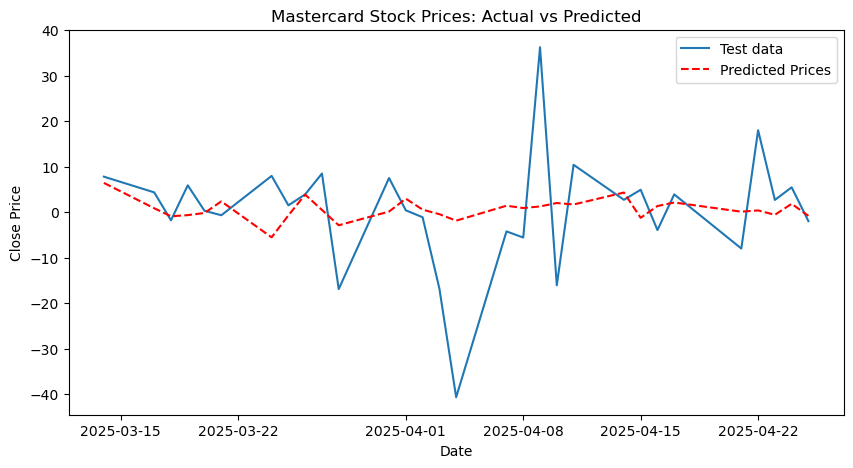

RMSE:  12.29


In [50]:
# Fit the ARMA model
model = ARIMA(train_data, order=(30, 0, 3))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Mastercard Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate model using RMSE score
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

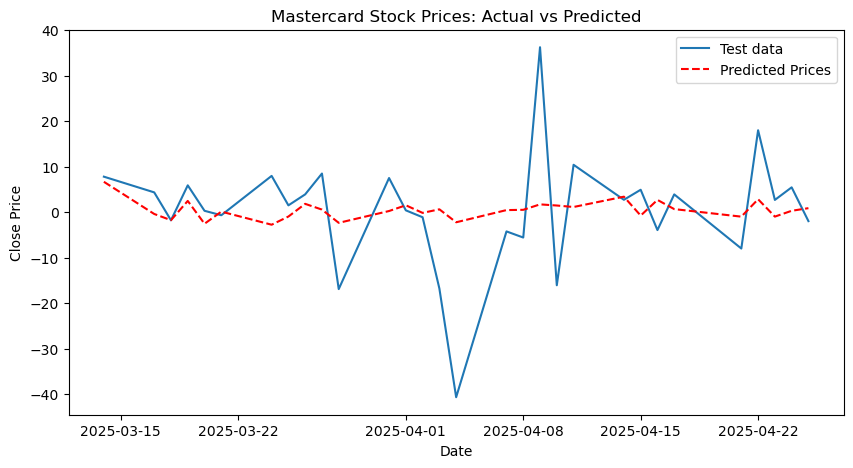

RMSE:  12.04


In [52]:
# Fit the  Autoregressive Integrated Moving Average(ARIMA) model to the training data
model = ARIMA(train_data, order=(30, 1, 3))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Plot the actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Mastercard Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)


In [ ]:
# SO AFTER NORMALIZING RMSE 
## for AR model = 0.332 
## for MA model = 0.341
## for ARMA model = 0.332
## for ARIMA model = 0.327
#SO ARIMA model suits better than other

In [55]:
sd.head

<bound method NDFrame.head of Price            Close        High         Low        Open   Volume
Ticker              MA          MA          MA          MA       MA
Date                                                               
2024-01-02  418.183075  420.552059  415.873531  420.363726  2463700
2024-01-03  415.090424  417.637849  413.831593  417.499095  3093700
2024-01-04  416.081635  419.729323  414.604736  414.822804  2042600
2024-01-05  415.734741  419.045390  413.326070  416.795317  2415900
2024-01-08  418.931458  419.030711  413.520818  416.409799  2125400
...                ...         ...         ...         ...      ...
2025-04-21  509.320007  517.650024  503.540009  517.000000  3345600
2025-04-22  527.330017  528.799988  512.750000  515.619995  2384000
2025-04-23  530.010010  543.940002  527.619995  537.739990  3051800
2025-04-24  535.460022  536.039978  525.270020  528.690002  2209100
2025-04-25  533.479980  536.919983  529.880005  535.460022  2006100

[330 rows x 5 col

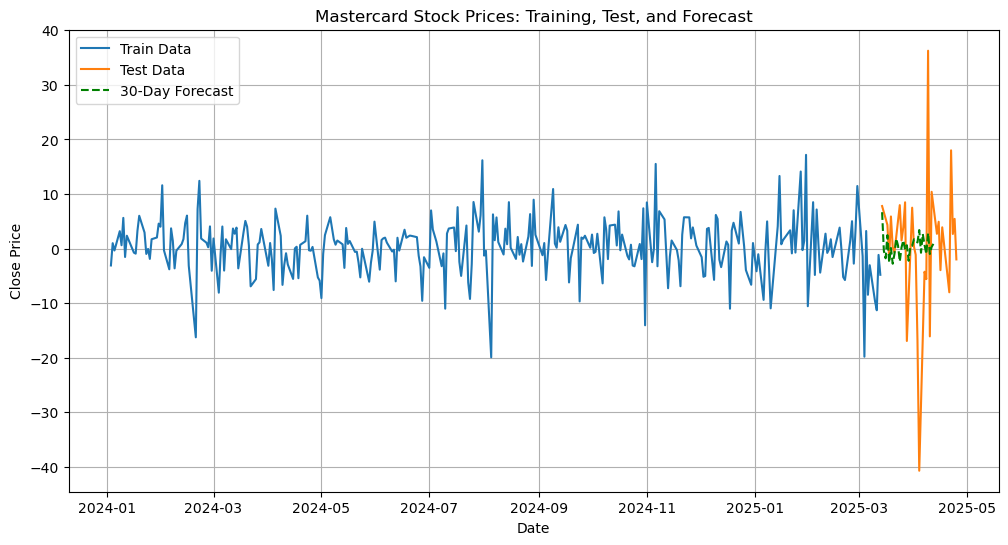

✅ Forecasted data saved successfully to 'forecasted_stock_prices.csv'.


In [59]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Fit the ARIMA model
model = ARIMA(train_data, order=(30, 1, 3))
model_fit = model.fit()

# Forecast for the next 30 days
forecast_steps = 30
forecast_values = model_fit.forecast(steps=forecast_steps)

# Create a proper DataFrame with both Date and Forecasted Values
forecast_dates = pd.date_range(start=train_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Close_Price': forecast_values.values  # Use .values to ensure correct format
})

# Save to CSV
forecast_df.to_csv('forecasted_stock_prices.csv', index=False)  # index=False to save cleanly

# Plot everything
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Close_Price'], color='green', linestyle='--', label='30-Day Forecast')
plt.title('Mastercard Stock Prices: Training, Test, and Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("✅ Forecasted data saved successfully to 'forecasted_stock_prices.csv'.")

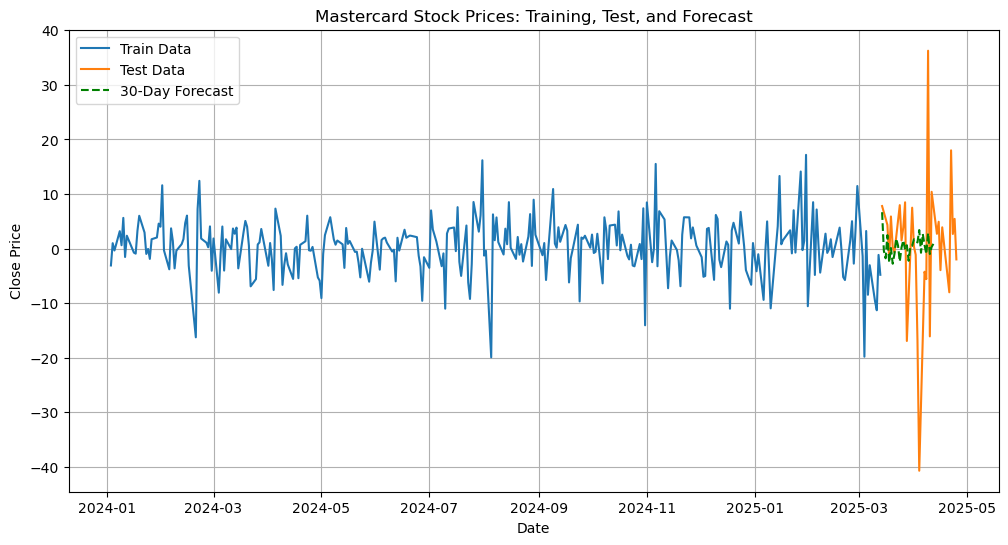

✅ Forecasted data saved successfully with correct stock prices.


In [61]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Fit the ARIMA model
model = ARIMA(train_data, order=(30, 1, 3))
model_fit = model.fit()

# Forecast for the next 30 days (in LEVELS, not differences)
forecast_steps = 30
forecast_values = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + forecast_steps - 1,
    typ='levels'  # important to reverse differencing
)

# Create a proper DataFrame
forecast_dates = pd.date_range(start=train_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Close_Price': forecast_values.values
})

# Save to CSV
forecast_df.to_csv('forecasted_newstock_prices.csv', index=False)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Close_Price'], color='green', linestyle='--', label='30-Day Forecast')
plt.title('Mastercard Stock Prices: Training, Test, and Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("✅ Forecasted data saved successfully with correct stock prices.")

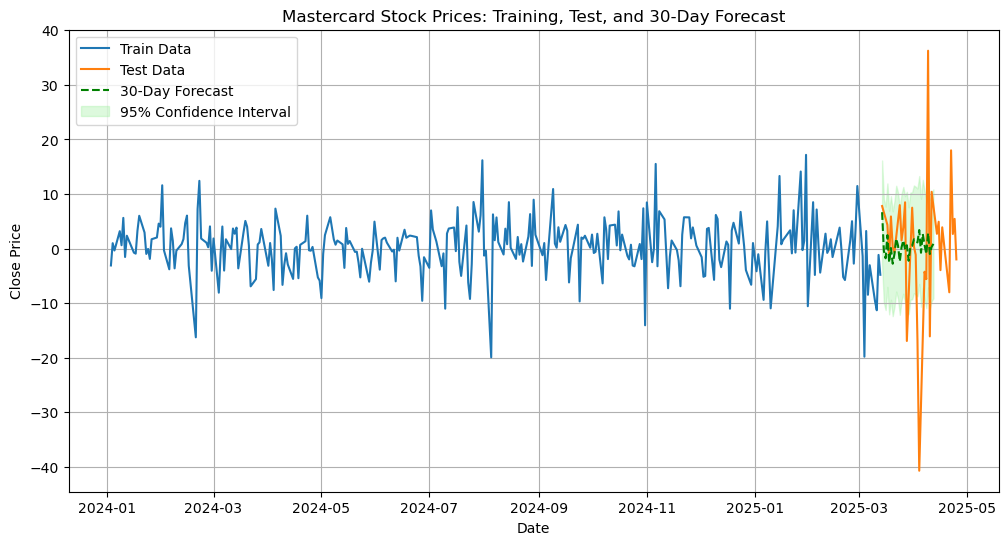

✅ Forecasted data saved successfully with realistic stock prices.


In [63]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Fit the ARIMA model
model = ARIMA(train_data, order=(30, 1, 3))
model_fit = model.fit()

# Forecast the next 30 days properly
forecast_steps = 30
forecast_obj = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_obj.predicted_mean  # actual forecasted stock prices
forecast_ci = forecast_obj.conf_int()          # optional: confidence intervals

# Create dates
forecast_dates = pd.date_range(start=train_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Build DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Close_Price': forecast_values.values
})

# Save to CSV
forecast_df.to_csv('forecasted_oldstock_prices.csv', index=False)

# Plot forecast with confidence interval
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Close_Price'], color='green', linestyle='--', label='30-Day Forecast')

# Plot confidence intervals
plt.fill_between(forecast_df['Date'],
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='lightgreen', alpha=0.3, label='95% Confidence Interval')

plt.title('Mastercard Stock Prices: Training, Test, and 30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("✅ Forecasted data saved successfully with realistic stock prices.")


In [65]:
sd.head

<bound method NDFrame.head of Price            Close        High         Low        Open   Volume
Ticker              MA          MA          MA          MA       MA
Date                                                               
2024-01-02  418.183075  420.552059  415.873531  420.363726  2463700
2024-01-03  415.090424  417.637849  413.831593  417.499095  3093700
2024-01-04  416.081635  419.729323  414.604736  414.822804  2042600
2024-01-05  415.734741  419.045390  413.326070  416.795317  2415900
2024-01-08  418.931458  419.030711  413.520818  416.409799  2125400
...                ...         ...         ...         ...      ...
2025-04-21  509.320007  517.650024  503.540009  517.000000  3345600
2025-04-22  527.330017  528.799988  512.750000  515.619995  2384000
2025-04-23  530.010010  543.940002  527.619995  537.739990  3051800
2025-04-24  535.460022  536.039978  525.270020  528.690002  2209100
2025-04-25  533.479980  536.919983  529.880005  535.460022  2006100

[330 rows x 5 col

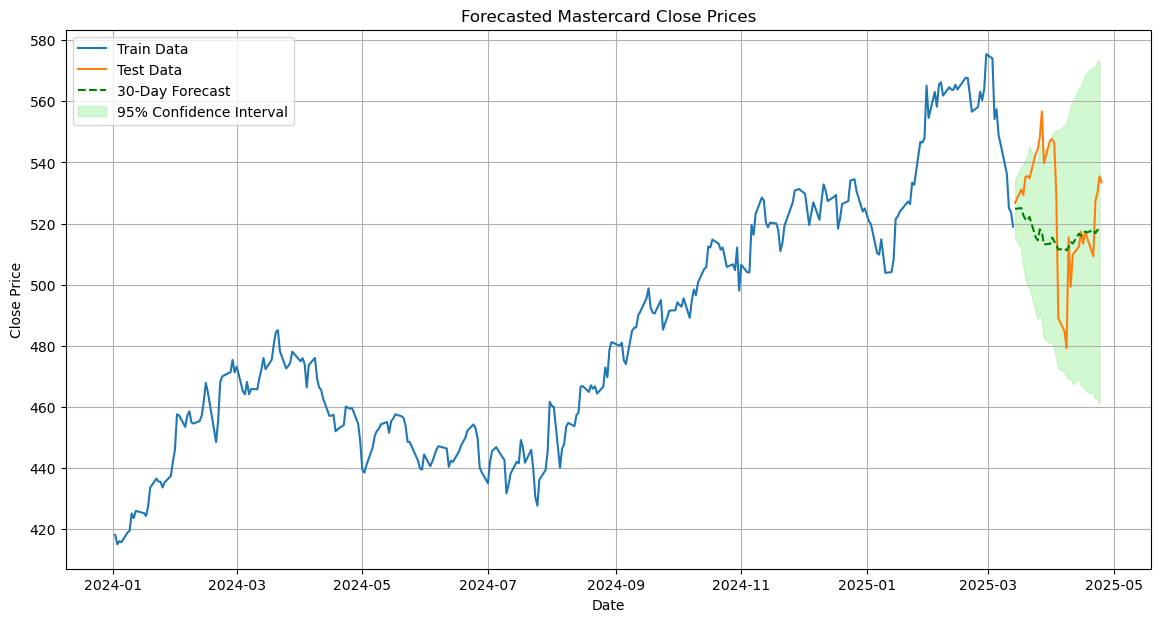

✅ Forecasted stock prices saved correctly into 'forecasted_stock_prices.csv'.


In [70]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'sd' is your full dataframe
# Extract 'Close' prices for ARIMA model
close_prices = sd['Close']  # column name is 'Close MA' as per screenshot

# Optional: Ensure date index is correct
close_prices.index = pd.to_datetime(close_prices.index)

# Split into train and test (you may already have)
train_data = close_prices[:-30]  # use all except last 30 days for training
test_data = close_prices[-30:]   # last 30 days for testing

# Fit ARIMA model
model = ARIMA(train_data, order=(30, 1, 3))  # You may tune order (p,d,q) later
model_fit = model.fit()

# Forecast the next 30 business days (market trading days)
forecast_steps = 30
forecast_obj = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_obj.predicted_mean
forecast_ci = forecast_obj.conf_int()

# Create business date range (skip weekends automatically)
forecast_dates = pd.bdate_range(start=train_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Build forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Close_Price': forecast_values.values
})

# Save forecast to CSV
forecast_df.to_csv('forecasted_stock_prices.csv', index=False)

# Plot everything
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Close_Price'], color='green', linestyle='--', label='30-Day Forecast')

# Plot confidence intervals
plt.fill_between(forecast_df['Date'],
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='lightgreen', alpha=0.4, label='95% Confidence Interval')

plt.title('Forecasted Mastercard Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("✅ Forecasted stock prices saved correctly into 'forecasted_stock_prices.csv'.")
